In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pandas import DataFrame as df
%matplotlib inline

In [19]:
train_original = pd.read_csv('train.csv')
validation_original = pd.read_csv('validation.csv')
test_original = pd.read_csv('test.csv')

In [22]:
train_original[0:5]

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,null
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1,...,250,FourthView,Na,0,10722,294,23,null,2821,null
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2,...,90,OtherView,Na,133,7330,277,133,null,2259,null


In [84]:
# split os and browser
def split_useragent_os(data):
    return data.split('_')[0]
def split_useragent_b(data):
    return data.split('_')[1]
def split_useragent(dataframe):
    dataframe['os'] = dataframe['useragent'].apply(split_useragent_os)
    dataframe['browser'] = dataframe['useragent'].apply(split_useragent_b)
    dataframe.drop(['useragent'], axis=1, inplace=True)

In [85]:
split_useragent(train_original)
split_useragent(validation_original)
split_useragent(test_original)

# Basic Dataset Statistics

In [86]:
dataset_stat = pd.DataFrame()
dataset_stat['advertiser'] = np.sort(train_original.advertiser.unique())
dataset_stat['impressions'] = train_original.groupby('advertiser').size().values
click = train_original.groupby('advertiser').click.value_counts()
dataset_stat['clicks'] = click.iloc[click.index.get_level_values('click') == 1].values  
temp = train_original.groupby('advertiser').payprice.sum().values
dataset_stat['cost'] = (temp/1000).round()
dataset_stat['CTR'] = (((dataset_stat.clicks / dataset_stat.impressions) * 100).round(3)).astype(str) + '%'
dataset_stat['CPM'] = (((dataset_stat.cost / dataset_stat.impressions)*1000).round(2)).astype(str)
dataset_stat['eCPC'] = ((dataset_stat.cost / dataset_stat.clicks).round(2)).astype(str)

dataset_stat

,advertiser,impressions,clicks,cost,CTR,CPM,eCPC
0,1458,492353,385,33969.0,0.078%,68.99,88.23
1,2259,133673,43,12428.0,0.032%,92.97,289.02
2,2261,110122,36,9874.0,0.033%,89.66,274.28
3,2821,211366,131,18828.0,0.062%,89.08,143.73
4,2997,49829,217,3129.0,0.435%,62.79,14.42
5,3358,264956,202,22447.0,0.076%,84.72,111.12
6,3386,455041,320,34932.0,0.07%,76.77,109.16
7,3427,402806,272,30459.0,0.068%,75.62,111.98
8,3476,310835,187,23919.0,0.06%,76.95,127.91


# User Feedback Analysis

In [87]:
train_original.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'IP', 'region', 'city',
       'adexchange', 'domain', 'url', 'urlid', 'slotid', 'slotwidth',
       'slotheight', 'slotvisibility', 'slotformat', 'slotprice', 'creative',
       'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag', 'os',
       'browser'],
      dtype='object')

## CTR  for  WEEKDAY, HOUR,REGION,CITY,ADEXCHANGE,,OS,BROWSER,SLOTPRICE

In [88]:
train_original[['click']].groupby(train_original['weekday']).mean()
train_original[['click', 'payprice']].groupby(train_original['advertiser']).mean()

,click
weekday,
0,0.000644
1,0.000676
2,0.000965
3,0.000833
4,0.000810
5,0.000725
6,0.000569


/Users/wujiexi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


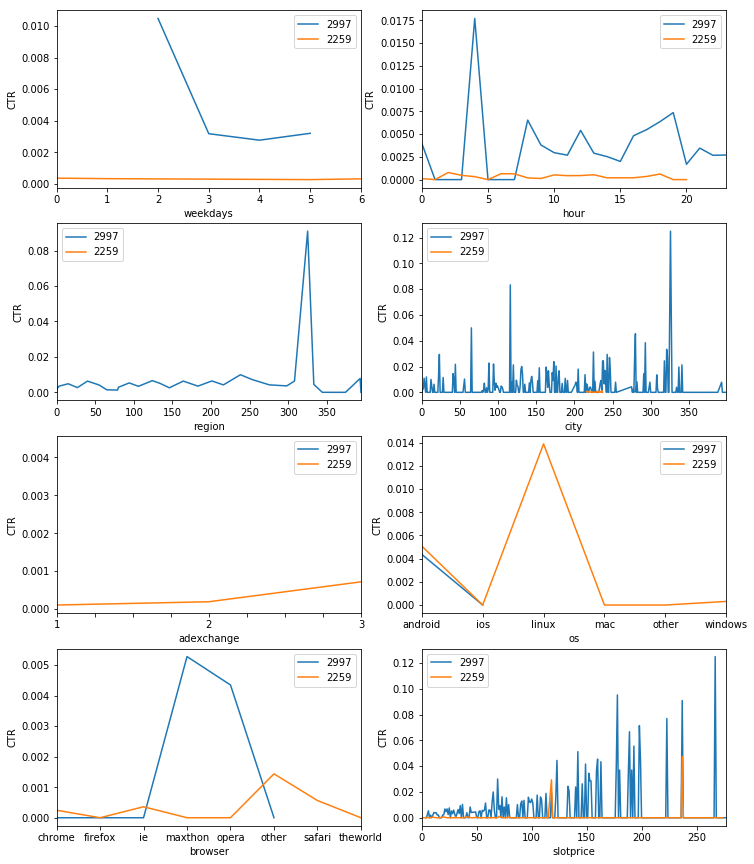

In [102]:
# 1. Line plot of CTR per weekday for advertiser 2997 & 2259
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,15))
plt.subplot(421)
df_2997 = train_original[train_original['advertiser']== 2997]
df_2259 = train_original[train_original['advertiser']== 2259]
df_2997['click'].groupby(df_2997['weekday']).mean().plot(label='2997')
df_2259['click'].groupby(df_2259['weekday']).mean().plot(label='2259')
plt.legend()
plt.xlabel('weekdays')
plt.ylabel('CTR')

plt.subplot(422)
df_2997 = train_original[train_original['advertiser']== 2997]
df_2259 = train_original[train_original['advertiser']== 2259]
df_2997['click'].groupby(df_2997['hour']).mean().plot(label='2997')
df_2259['click'].groupby(df_2259['hour']).mean().plot(label='2259')
plt.legend()
plt.xlabel('hour')
plt.ylabel('CTR')

plt.subplot(423)
df_2997 = train_original[train_original['advertiser']== 2997]
df_2259 = train_original[train_original['advertiser']== 2259]
df_2997['click'].groupby(df_2997['region']).mean().plot(label='2997')
df_2259['click'].groupby(df_2259['region']).mean().plot(label='2259')
plt.legend()
plt.xlabel('region')
plt.ylabel('CTR')

plt.subplot(424)
df_2997 = train_original[train_original['advertiser']== 2997]
df_2259 = train_original[train_original['advertiser']== 2259]
df_2997['click'].groupby(df_2997['city']).mean().plot(label='2997')
df_2259['click'].groupby(df_2259['city']).mean().plot(label='2259')
plt.legend()
plt.xlabel('city')
plt.ylabel('CTR')

plt.subplot(425)
df_2997 = train_original[train_original['advertiser']== 2997]
df_2259 = train_original[train_original['advertiser']== 2259]
df_2997['click'].groupby(df_2997['adexchange']).mean().plot(label='2997')
df_2259['click'].groupby(df_2259['adexchange']).mean().plot(label='2259')
plt.legend()
plt.xlabel('adexchange')
plt.ylabel('CTR')

plt.subplot(426)
df_2997 = train_original[train_original['advertiser']== 2997]
df_2259 = train_original[train_original['advertiser']== 2259]
df_2997['click'].groupby(df_2997['os']).mean().plot(label='2997')
df_2259['click'].groupby(df_2259['os']).mean().plot(label='2259')
plt.legend()
plt.xlabel('os')
plt.ylabel('CTR')

plt.subplot(427)
df_2997 = train_original[train_original['advertiser']== 2997]
df_2259 = train_original[train_original['advertiser']== 2259]
df_2997['click'].groupby(df_2997['browser']).mean().plot(label='2997')
df_2259['click'].groupby(df_2259['browser']).mean().plot(label='2259')
plt.legend()
plt.xlabel('browser')
plt.ylabel('CTR')

plt.subplot(428)
df_2997 = train_original[train_original['advertiser']== 2997]
df_2259 = train_original[train_original['advertiser']== 2259]
df_2997['click'].groupby(df_2997['slotprice']).mean().plot(label='2997')
df_2259['click'].groupby(df_2259['slotprice']).mean().plot(label='2259')
plt.legend()
plt.xlabel('slotprice')
plt.ylabel('CTR')

## Market price for bidding behaviour¶

/Users/wujiexi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


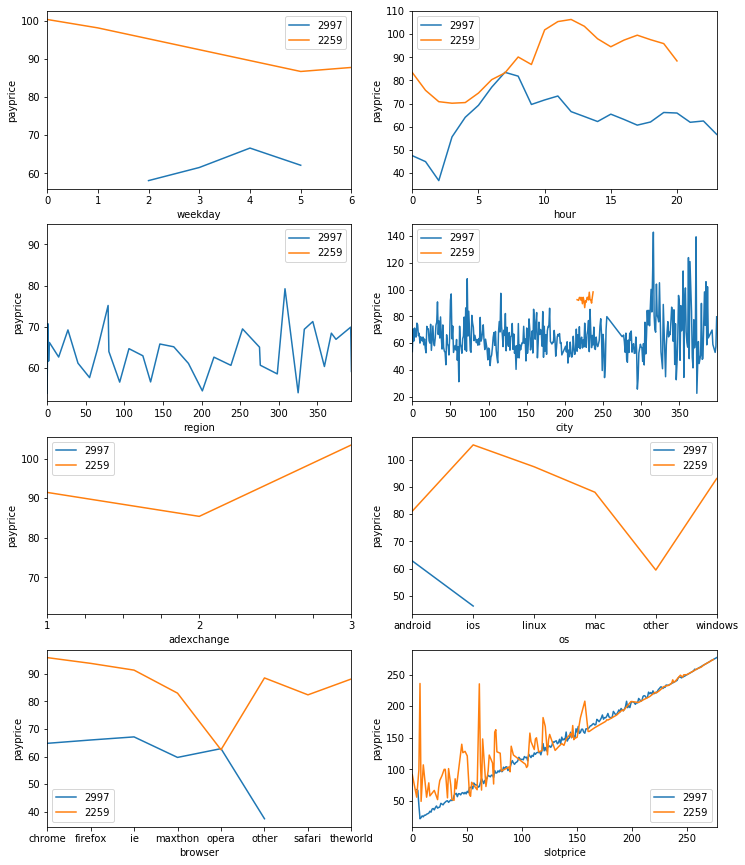

In [103]:
plt.figure(figsize=(12,15))
plt.subplot(421)
df_2997 = train_original[train_original['advertiser']== 2997]
df_2259 = train_original[train_original['advertiser']== 2259]
df_2997['payprice'].groupby(df_2997['weekday']).mean().plot(label='2997')
df_2259['payprice'].groupby(df_2259['weekday']).mean().plot(label='2259')
plt.legend()
plt.xlabel('weekday')
plt.ylabel('payprice')

plt.subplot(422)
df_2997 = train_original[train_original['advertiser']== 2997]
df_2259 = train_original[train_original['advertiser']== 2259]
df_2997['payprice'].groupby(df_2997['hour']).mean().plot(label='2997')
df_2259['payprice'].groupby(df_2259['hour']).mean().plot(label='2259')
plt.legend()
plt.xlabel('hour')
plt.ylabel('payprice')

plt.subplot(423)
df_2997 = train_original[train_original['advertiser']== 2997]
df_2259 = train_original[train_original['advertiser']== 2259]
df_2997['payprice'].groupby(df_2997['region']).mean().plot(label='2997')
df_2259['payprice'].groupby(df_2259['region']).mean().plot(label='2259')
plt.legend()
plt.xlabel('region')
plt.ylabel('payprice')

plt.subplot(424)
df_2997 = train_original[train_original['advertiser']== 2997]
df_2259 = train_original[train_original['advertiser']== 2259]
df_2997['payprice'].groupby(df_2997['city']).mean().plot(label='2997')
df_2259['payprice'].groupby(df_2259['city']).mean().plot(label='2259')
plt.legend()
plt.xlabel('city')
plt.ylabel('payprice')

plt.subplot(425)
df_2997 = train_original[train_original['advertiser']== 2997]
df_2259 = train_original[train_original['advertiser']== 2259]
df_2997['payprice'].groupby(df_2997['adexchange']).mean().plot(label='2997')
df_2259['payprice'].groupby(df_2259['adexchange']).mean().plot(label='2259')
plt.legend()
plt.xlabel('adexchange')
plt.ylabel('payprice')

plt.subplot(426)
df_2997 = train_original[train_original['advertiser']== 2997]
df_2259 = train_original[train_original['advertiser']== 2259]
df_2997['payprice'].groupby(df_2997['os']).mean().plot(label='2997')
df_2259['payprice'].groupby(df_2259['os']).mean().plot(label='2259')
plt.legend()
plt.xlabel('os')
plt.ylabel('payprice')



plt.subplot(427)
df_2997 = train_original[train_original['advertiser']== 2997]
df_2259 = train_original[train_original['advertiser']== 2259]
df_2997['payprice'].groupby(df_2997['browser']).mean().plot(label='2997')
df_2259['payprice'].groupby(df_2259['browser']).mean().plot(label='2259')
plt.legend()
plt.xlabel('browser')
plt.ylabel('payprice')

plt.subplot(428)
df_2997 = train_original[train_original['advertiser']== 2997]
df_2259 = train_original[train_original['advertiser']== 2259]
df_2997['payprice'].groupby(df_2997['slotprice']).mean().plot(label='2997')
df_2259['payprice'].groupby(df_2259['slotprice']).mean().plot(label='2259')
plt.legend()
plt.xlabel('slotprice')
plt.ylabel('payprice')